# Stock Market Price Trend Prediction Using Time Series Forecasting (ARIMA Model)

##### By Santi Swain


### Introduction:

The stock market is a complex and dynamic system, influenced by a multitude of factors ranging from global events to company news, economic indicators, and investor sentiment. Predicting stock prices has been a topic of interest for investors, analysts, and researchers for many decades. Accurate predictions can lead to significant financial gains, while inaccurate ones can lead to substantial losses. As such, various mathematical and statistical techniques have been employed to better understand and forecast stock market movements.

This project aims to leverage the power of time series forecasting, specifically using the ARIMA (AutoRegressive Integrated Moving Average) model, to predict stock market price trends. ARIMA is a popular method for analyzing and forecasting time series data as it can capture a suite of different standard temporal structures in time series data.

### Problem Statement:

Predict the future closing price of a given stock (in this case, SPDR S&P 500 ETF Trust; Ticker Symbol 'SPY'), based on its historical data, using the ARIMA model. The objectives are:

1. Conduct a thorough exploratory data analysis (EDA) to understand the underlying patterns and characteristics of the data.
2. Develop a time series forecasting model that can predict future stock prices with reasonable accuracy.
3. Evaluate the model's performance against actual stock prices to determine its efficacy and reliability.

### Plan:
1. Data Loading and Inspection
2. Data Quality Checks
3. Feature Engineering
4. Exploratory Data Analysis (EDA)
5. Formulating Hypotheses for Further Analysis 
6. Preliminary Observations and Next Steps



### Let us being:

Let's start by loading the dataset and performing some initial exploration. This will help us identify any data quality issues, potential feature engineering opportunities, and other preprocessing needs.

After that, we'll dive into a preliminary Exploratory Data Analysis (EDA) to gain insights about the data and describe the relationships between variables.



#### 1. Data Loading and Inspection
- Load the dataset.
- Inspect the first and last few rows.
- Check for missing values.
- Get data types and basic statistics.

In [1]:
import pandas as pd

In [9]:
# Load the dataset
df = pd.read_csv('SPY Stock Price Historical Data.csv', parse_dates=['Date'])

In [5]:
# Inspect the first few rows
df_head = df.head()
df_head

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,24.941385,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,25.118786,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,25.172001,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,25.438099,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,25.544525,531500


In [6]:
# Inspect the last few rows
df_tail = df.tail()
df_tail

,Date,Open,High,Low,Close,Adj Close,Volume
7726,2023-10-05,424.359985,425.369995,421.170013,424.500000,424.500000,70142700
7727,2023-10-06,421.970001,431.130005,420.600006,429.540009,429.540009,113202700
7728,2023-10-09,427.579987,432.880005,427.010010,432.290009,432.290009,80374400
7729,2023-10-10,432.940002,437.220001,432.529999,434.540009,434.540009,78607300
7730,2023-10-11,435.640015,436.579987,433.179993,436.320007,436.320007,62344800


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# Get data types and basic statistics
data_info = df.info()
data_description = df.describe()
data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7731 non-null   datetime64[ns]
 1   Open       7731 non-null   float64       
 2   High       7731 non-null   float64       
 3   Low        7731 non-null   float64       
 4   Close      7731 non-null   float64       
 5   Adj Close  7731 non-null   float64       
 6   Volume     7731 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 422.9 KB


,Date,Open,High,Low,Close,Adj Close,Volume
count,7731,7731.000000,7731.000000,7731.000000,7731.000000,7731.000000,7.731000e+03
mean,2008-06-02 07:38:01.257275904,168.478056,169.493032,167.360623,168.485276,140.462221,8.450136e+07
min,1993-01-29 00:00:00,43.343750,43.531250,42.812500,43.406250,24.639824,5.200000e+03
25%,2000-09-23 12:00:00,104.915001,105.744999,104.109996,104.994999,70.673821,9.790250e+06
50%,2008-06-04 00:00:00,131.750000,132.671875,130.875000,131.812500,93.525024,6.282430e+07
75%,2016-02-06 12:00:00,209.389999,210.250000,208.535004,209.400002,180.933625,1.164806e+08
max,2023-10-11 00:00:00,479.220001,479.980011,476.059998,477.709991,464.923401,8.710263e+08
std,NaN,104.403777,104.972889,103.795091,104.427199,110.289225,9.264409e+07


##### Dataset Structure:
The dataset has 7 columns: Date, Open, High, Low, Close, Adj Close, and Volume.
There are 7,731 entries, spanning from January 29, 1993, to October 11, 2023.

##### Missing Values:
There are no missing values in any of the columns.

##### Data Types:
The 'Date' column is in the datetime format.
The columns 'Open', 'High', 'Low', 'Close', and 'Adj Close' are floating-point numbers representing stock prices.
The 'Volume' column is an integer representing the trading volume.

##### Basic Statistics:
The minimum opening price is approximately 43.34. The maximum is approximately 479.22.
The trading volume varies greatly, with a minimum of 5,200 and a maximum of 871,026,300.

#### 2. Data Quality Checks
- Check for duplicate entries.
- Ensure date consistency and sort by date.

In [10]:
# Check for duplicate entries
duplicates = df.duplicated().sum()
duplicates

0

In [11]:
# Ensure date consistency and sort by date
df = df.sort_values('Date')

# Check if dates are unique
unique_dates = df['Date'].nunique() == df.shape[0]
unique_dates

True

##### Duplicate Entries:
- There are no duplicate entries in the dataset.

##### Date Consistency:
- The dataset is sorted in ascending order by date.
- All dates are unique, indicating that there's one entry per day.

#### 3. Feature Engineering
- Create lag features (previous day's prices).
- Extract date-related features (day, month, year, day of the week).

We'll create lag features to capture the previous day's prices and extract date-related features to help capture any seasonal or trend effects.

In [12]:
# Create lag features (previous day's prices)
df['Prev_Close'] = df['Close'].shift(1)

In [17]:
# Extract date-related features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6

# First few rows of the updated dataframe
df_head_updated = df.head()

df_head_updated

,Date,Open,High,Low,Close,Adj Close,Volume,Prev_Close,Year,Month,Day,DayOfWeek
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,24.941385,1003200,NaN,1993,1,29,4
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,25.118786,480500,43.93750,1993,2,1,0
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,25.172001,201300,44.25000,1993,2,2,1
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,25.438099,529400,44.34375,1993,2,3,2
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,25.544525,531500,44.81250,1993,2,4,3


##### Lag Features:
- A 'Prev_Close' column was added to represent the previous day's closing price. The first entry does not have a value for this feature, as expected, since there's no preceding day's data.

##### Date-related Features:
- Extracted the 'Year', 'Month', 'Day', and 'DayOfWeek' from the 'Date' column. The 'DayOfWeek' feature ranges from 0 (Monday) to 6 (Sunday).

With these new features, we can delve deeper into relationships and seasonality in the data.

#### 4. Exploratory Data Analysis (EDA)
- Time series plot for stock prices over time.
- Distribution of daily returns.
- Correlation analysis.
- Seasonal decomposition.

We'll visualize the stock prices over time, understand the distribution of daily returns, perform correlation analysis, and decompose the time series to observe any trends or seasonality.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
# Setting style
sns.set_style("whitegrid")

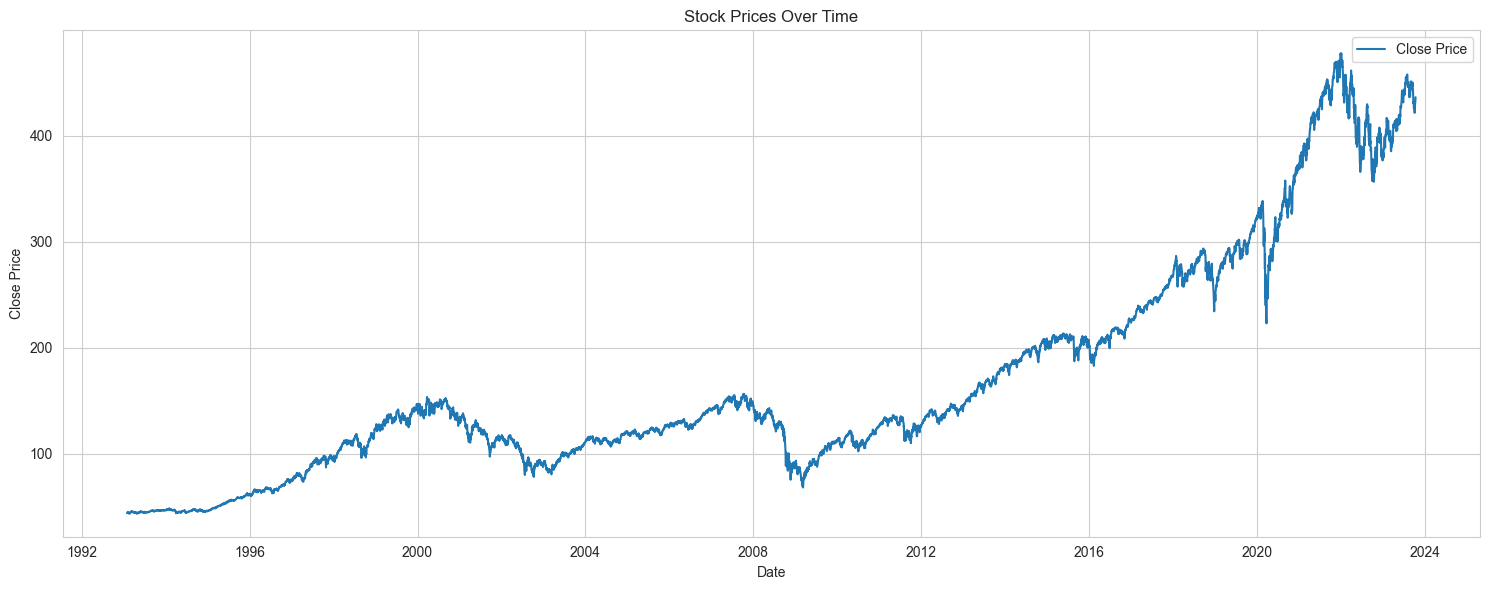

In [20]:
# a. Time series plot for stock prices over time
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()

##### Stock Prices Over Time:
- The stock price exhibits an upward trend over the years, with some noticeable peaks and troughs, indicating periods of rapid growth and decline.

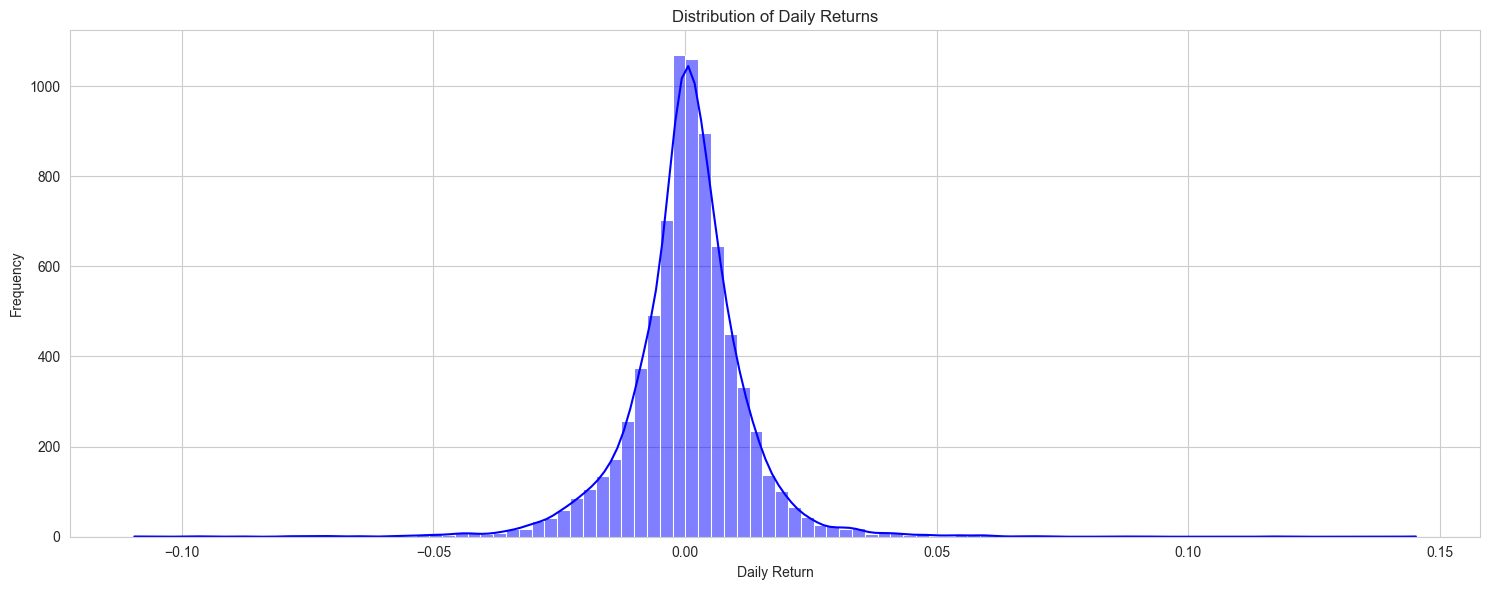

In [21]:
# b. Distribution of daily returns
df['Daily_Return'] = df['Close'].pct_change()
plt.figure(figsize=(15, 6))
sns.histplot(df['Daily_Return'].dropna(), bins=100, kde=True, color='blue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##### Distribution of Daily Returns:
- The daily returns are centered around 0, with a bell-shaped distribution, which is characteristic of stock returns.
- Most returns are clustered around 0, with few extreme positive or negative returns.

In [23]:
# c. Correlation analysis
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Prev_Close']].corr()
correlation_matrix

,Open,High,Low,Close,Volume,Prev_Close
Open,1.000000,0.999935,0.999917,0.999857,0.091242,0.999914
High,0.999935,1.000000,0.999865,0.999912,0.093744,0.999877
Low,0.999917,0.999865,1.000000,0.999921,0.087788,0.999834
Close,0.999857,0.999912,0.999921,1.000000,0.090429,0.999767
Volume,0.091242,0.093744,0.087788,0.090429,1.000000,0.092132
Prev_Close,0.999914,0.999877,0.999834,0.999767,0.092132,1.000000


##### Correlation Analysis:
- The price columns ('Open', 'High', 'Low', and 'Close') have almost perfect positive correlations with each other. This is expected since they all represent prices within the same day.
- The 'Volume' column has a very low correlation with the price columns, suggesting that the daily trading volume and price don't move strictly in tandem.
- The 'Prev_Close' column, representing the previous day's closing price, has a high correlation with the price columns of the current day. This indicates that prices from one day to the next are quite closely related.

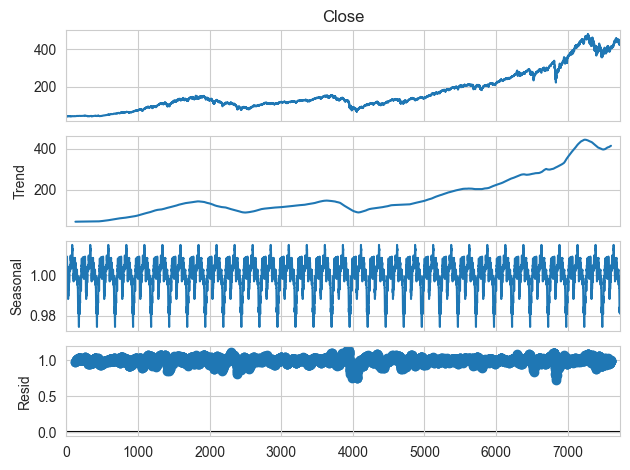

In [25]:
# d. Seasonal decomposition
decomposition = seasonal_decompose(df['Close'].dropna(), model='multiplicative', period=252)  # Using yearly frequency

decomposition_plot = decomposition.plot()
plt.tight_layout()
plt.show()

##### Seasonal Decomposition:
- The decomposition plot provides insights into the trend, seasonal, and residual components of the stock price.
- The trend component shows the long-term progression of the stock price.
- The seasonal component doesn't show a strong yearly seasonality, which suggests that while there might be short-term fluctuations, there aren't strong recurring patterns on an annual basis for this stock.
- The residuals represent the noise or unexplained variation after removing the trend and seasonality.

#### 5. Formulating Hypotheses for Further Analysis

Given the time series nature of stock prices and the inherent patterns observed in financial markets, we can formulate the following hypotheses for further analysis using the ARIMA model:

##### 5.1. Stationarity Hypothesis:

Ho : The stock price time series is non-stationary (i.e., it has a time-dependent structure).
H1 : The stock price time series is stationary (i.e., it does not have a time-dependent structure).

Rationale: Stationarity is a crucial assumption for time series forecasting, and non-stationary data can be transformed to achieve stationarity.

##### 5.2. Autocorrelation Hypothesis:

Ho : There is no autocorrelation in the stock price time series.
H1 : There is significant autocorrelation in the stock price time series.

Rationale: Understanding autocorrelation helps in determining the AR (AutoRegressive) component of the ARIMA model.

##### 5.3. Moving Average Hypothesis:

Ho : Past white noise (shocks or errors) do not predict the future movements of the stock price time series.
H1 : Past white noise (shocks or errors) significantly predicts the future movements of the stock price time series.

Rationale: This helps in identifying the MA (Moving Average) component of the ARIMA model.

##### 5.4. Predictive Power Hypothesis:

Ho : The ARIMA model does not provide a better forecast of stock prices than a naïve model (e.g., predicting the next value based on the last observed value).
H1 : The ARIMA model provides a significantly better forecast of stock prices than a naive model.

Rationale: To validate the utility of the ARIMA model for stock price prediction.



These hypotheses will guide the analysis and model-building process. By testing these hypotheses, we aim to validate the assumptions and effectiveness of the ARIMA model for forecasting stock prices.

#### 6. Preliminary Observations and Next Steps
- The dataset is of high quality with no missing or duplicate values.
- The stock price has shown significant growth over the years.
- There's potential to leverage the 'Prev_Close' feature for prediction, given its high correlation with the current day's prices.
- While there are daily fluctuations in stock prices, there doesn't seem to be a strong yearly seasonality for this stock.



The next steps would involve splitting the data into training and testing sets, training the ARIMA model, and evaluating its performance. However, this preliminary EDA provides a good understanding of the data's characteristics and the relationships among variables.